# Markowitz Portfolio Theory

Markowitz proved the existence of an efficient set of portfolios that optimize investor's return for the amount of risk they are willing to accept. 

Important highlight of his work was that investments in multiple securities should be considered in a portfolio rather than analyzed separately. Essentially, financiers should understand the relationship between different securities in a portfolio. Consequently, Markowitz recommended that through the combination of securities with low correlation, investors can optimize their returns without assuming additional risk.

>Diversified Portfolio -> higher returns and no additional risk

#Efficient Frontier

In [1]:
# Update pandas datareader
!pip install --upgrade pandas-datareader

In [2]:
# Import relevant libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
#%matplotlib inline       # facilitated plotting matplotlip plots just below code cells and stores them in the Colab notebook document

In [3]:
# Import data
assets = ['PG', '^GSPC']        # P&G and S&P 500 Index
portfo_data = pd.DataFrame()    # create dataframe for portfolio data

for a in assets:                # load asset data into the created pandas portfolio dataframe
  portfo_data[a] = web.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [4]:
# Review the last 5 rows of the portfolio dataframe
portfo_data.tail()

,PG,^GSPC
Date,,
2022-02-14,156.740005,4401.669922
2022-02-15,156.820007,4471.069824
2022-02-16,158.009995,4475.009766
2022-02-17,159.820007,4380.259766
2022-02-18,159.899994,4348.870117


In [5]:
# Normalize the portfolio data
norm_portfo_data = portfo_data / portfo_data.iloc[0] * 100
norm_portfo_data.tail()

,PG,^GSPC
Date,,
2022-02-14,371.067226,388.500336
2022-02-15,371.256622,394.625713
2022-02-16,374.073805,394.973460
2022-02-17,378.358840,386.610632
2022-02-18,378.548201,383.840118


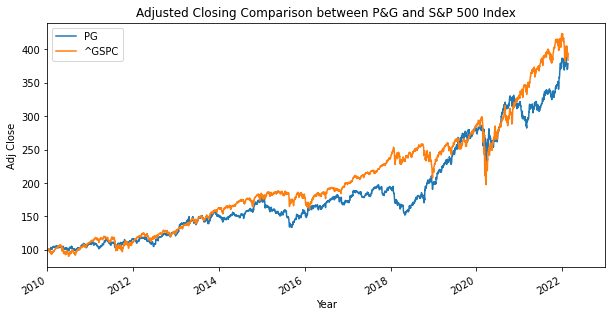

In [6]:
# Visualize the normalized portfolio data
norm_portfo_data.plot(figsize=(10,5));
plt.xlim(['01-01-2010','01-01-2023'])
plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.title('Adjusted Closing Comparison between P&G and S&P 500 Index')
plt.show()

Log Returns - preferable when making calculations about a single asset over time.

  * Log(Ending Price / Beginning Price)

In [7]:
# Determine the log rate of return
log_returns = np.log(portfo_data / portfo_data.shift(1))
log_returns.tail()            # check the last 5 rows to make sure calc is effective

,PG,^GSPC
Date,,
2022-02-14,0.002875,-0.003848
2022-02-15,0.000510,0.015644
2022-02-16,0.007560,0.000881
2022-02-17,0.011390,-0.021401
2022-02-18,0.000500,-0.007192


In [8]:
# Determine the annual mean of the log rate of returns
log_returns_amean = log_returns.mean() * 250     # 250 trading days in a year
log_returns_amean

PG       0.108970
^GSPC    0.110106
dtype: float64

In [9]:
# Determine the annual covariance of the log rate of returns
log_returns_acov = log_returns.cov() * 250      # 250 trading days in a year
log_returns_acov

,PG,^GSPC
PG,0.028465,0.016684
^GSPC,0.016684,0.029574


In [10]:
# Determine the correlation between the log rate of returns from P&G and S&P 500 Index
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.575025
^GSPC,0.575025,1.000000


❗❗❗**REMEMBER:** Perfect Correlation = 1

entire variability of the second variable is explained by the first variable

In [11]:
# Set n for number of assets
n_assets = len(assets)
n_assets

2

In [12]:
# Set weights of the assets
np.random.seed(42)      # allows for reproducibility
weights = np.random.random(n_assets)
weights /= np.sum(weights)    # to ensure that the two weights from this array sum to 1
weights

array([0.28261752, 0.71738248])

In [13]:
# Check that the sum is equal to 1 (for 100%)
weights[0] + weights[1]

1.0

### Expected Portfolio Return (Annual)

In [14]:
exp_portfo_return = np.sum(weights * log_returns.mean()) * 250   # 250 trading days in a year
print('Annual Expected Portfolio Return is', str(round(exp_portfo_return *100, 2)) +  '%')

Annual Expected Portfolio Return is 10.98%


### Expected Portfolio Variane (Annual)

In [15]:
exp_portfo_var = np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))   # 250 trading days in a year
print('Annual Expected Portfolio Variance is', str(round(exp_portfo_var *100, 2)) +  '%')

Annual Expected Portfolio Variance is 2.43%


### Expected Portfolio Volatility

In [16]:
exp_portfo_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
print('Annual Expected Portfolio Volatility is', str(round(exp_portfo_vol *100, 2)) +  '%')

Annual Expected Portfolio Volatility is 15.58%


Considering 1,000 different combinations of the same assets.

##Compare the Various Weights of the Portfolio

##Portfolio 1

In [17]:
# Functionize the process for Portfolio 1

np.random.seed(42)     # allow for reproducibility
# Create empty list to store portfolio returns and volatility
portfo_returns = []
portfo_vol = []

for x in range (1000):
  weights = np.random.random(n_assets)      # randomize the weights
  weights /= np.sum(weights)                # to ensure that the two weights from this array sum to 1
  portfo_returns.append(np.sum(weights * log_returns.mean()) * 250)                     # 250 trading days in a year
  portfo_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() *250, weights))))

portfo_returns, portfo_vol = np.array(portfo_returns), np.array(portfo_vol)  # convert lists into arrays

portfo_returns, portfo_vol   # print the two arrays

(array([0.10978491, 0.10948093, 0.10953782, 0.11003467, 0.10958429,
        0.11008247, 0.10920062, 0.10954032, 0.10968901, 0.1094273 ,
        0.10918064, 0.10960191, 0.10968852, 0.10978823, 0.10905228,
        0.10921871, 0.11003317, 0.1094875 , 0.10924557, 0.10941452,
        0.10988138, 0.11006467, 0.10978688, 0.1096802 , 0.10925681,
        0.10947454, 0.10952403, 0.10965899, 0.10975257, 0.10996738,
        0.10943686, 0.10931164, 0.10971845, 0.10993627, 0.11002627,
        0.10920223, 0.11009844, 0.10954663, 0.10906919, 0.10924725,
        0.10944619, 0.10915276, 0.10955055, 0.10949961, 0.1093644 ,
        0.10994289, 0.10945212, 0.10941334, 0.10948095, 0.10988939,
        0.1100526 , 0.10967197, 0.10921454, 0.10970608, 0.10925575,
        0.10937592, 0.10949811, 0.10962775, 0.10918376, 0.1093977 ,
        0.10956744, 0.10926182, 0.10971064, 0.10955232, 0.11009082,
        0.10936434, 0.10980832, 0.10925975, 0.10962354, 0.10979664,
        0.1092053 , 0.10939806, 0.10909994, 0.10

In [18]:
# Create a dataframe of two columns for Returns and Volatility
portfo_1 = pd.DataFrame({'Return': portfo_returns, 'Volatility': portfo_vol})
portfo_1.head(), portfo_1.tail()

(     Return  Volatility
 0  0.109785    0.155752
 1  0.109481    0.151188
 2  0.109538    0.151167
 3  0.110035    0.167485
 4  0.109584    0.151453,        Return  Volatility
 995  0.109165    0.158567
 996  0.109176    0.158115
 997  0.109500    0.151136
 998  0.109046    0.164292
 999  0.109915    0.161047)

Text(0.5, 1.0, 'Portfolio 1')

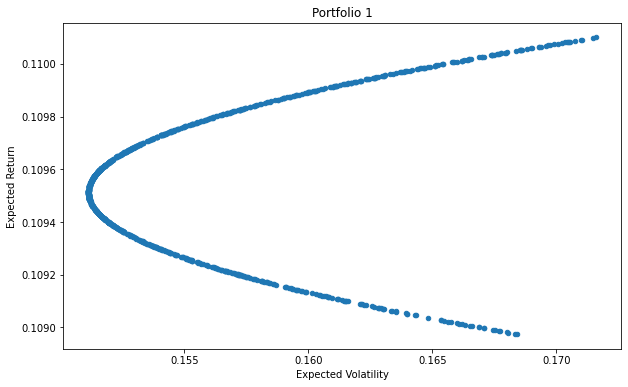

In [19]:
# Visualize Portfolio 1
portfo_1.plot(x='Volatility', y ='Return', kind = 'scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Portfolio 1')

## Portfolio 2

In [20]:
# Import data
assets_2 = ['PFE', '^GSPC']        # Pfizer, Inc. and S&P 500 Index
portfo_data_2 = pd.DataFrame()    # create dataframe for portfolio data

for a in assets_2:                # load asset data into the created pandas portfolio dataframe
  portfo_data_2[a] = web.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [21]:
# Review the last 5 rows of the portfolio dataframe
portfo_data_2.tail()

,PFE,^GSPC
Date,,
2022-02-14,49.799999,4401.669922
2022-02-15,49.790001,4471.069824
2022-02-16,49.680000,4475.009766
2022-02-17,48.900002,4380.259766
2022-02-18,48.529999,4348.870117


In [22]:
# Normalize the portfolio data
norm_portfo_data_2 = portfo_data_2 / portfo_data_2.iloc[0] * 100
norm_portfo_data_2.tail()

,PFE,^GSPC
Date,,
2022-02-14,436.736672,388.500336
2022-02-15,436.648988,394.625713
2022-02-16,435.684304,394.973460
2022-02-17,428.843860,386.610632
2022-02-18,425.599005,383.840118


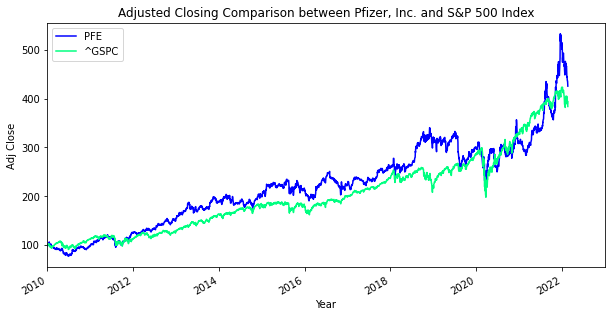

In [23]:
# Visualize the normalized portfolio data
norm_portfo_data_2.plot(figsize=(10,5),
                        colormap = 'winter');
plt.xlim(['01-01-2010','01-01-2023'])
plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.title('Adjusted Closing Comparison between Pfizer, Inc. and S&P 500 Index')
plt.show()

In [24]:
# Determine the log rate of return
log_returns_2 = np.log(portfo_data_2 / portfo_data_2.shift(1))
log_returns_2.tail()            # check the last 5 rows to make sure calc is effective

,PFE,^GSPC
Date,,
2022-02-14,-0.019488,-0.003848
2022-02-15,-0.000201,0.015644
2022-02-16,-0.002212,0.000881
2022-02-17,-0.015825,-0.021401
2022-02-18,-0.007595,-0.007192


In [25]:
# Determine the annual mean of the log rate of returns
log_returns_2_amean = log_returns_2.mean() * 250     # 250 trading days in a year
log_returns_2_amean

PFE      0.118560
^GSPC    0.110106
dtype: float64

In [26]:
# Determine the annual covariance of the log rate of returns
log_returns_2_acov = log_returns_2.cov() * 250      # 250 trading days in a year
log_returns_2_acov

,PFE,^GSPC
PFE,0.044084,0.020849
^GSPC,0.020849,0.029574


In [27]:
# Determine the correlation between the log rate of returns from Pfizer, Inc. and S&P 500 Index
log_returns_2.corr()

,PFE,^GSPC
PFE,1.000000,0.577415
^GSPC,0.577415,1.000000


In [28]:
# Set n for number of assets
n_assets_2 = len(assets)
n_assets_2

2

In [29]:
# Functionize the process for Portfolio 2

np.random.seed(42)     # allow for reproducibility
# Create empty list to store portfolio returns and volatility
portfo_2_returns = []
portfo_2_vol = []

for x in range (1000):
  weights_2 = np.random.random(n_assets_2)      # randomize the weights
  weights_2 /= np.sum(weights_2)                # to ensure that the two weights from this array sum to 1
  portfo_2_returns.append(np.sum(weights_2 * log_returns_2.mean()) * 250)                     # 250 trading days in a year
  portfo_2_vol.append(np.sqrt(np.dot(weights_2.T, np.dot(log_returns_2.cov() *250, weights_2))))

portfo_2_returns, portfo_2_vol = np.array(portfo_2_returns), np.array(portfo_2_vol)  # convert lists into arrays

portfo_2_returns, portfo_2_vol   # print the two arrays

(array([0.11249527, 0.11475653, 0.11433331, 0.11063735, 0.11398765,
        0.11028177, 0.11684174, 0.1143147 , 0.11320862, 0.11515545,
        0.11699036, 0.11385659, 0.11321225, 0.11247053, 0.11794522,
        0.11670711, 0.11064846, 0.11470761, 0.11650735, 0.11525055,
        0.1117776 , 0.11041414, 0.11248063, 0.11327416, 0.11642374,
        0.11480407, 0.11443592, 0.11343192, 0.11273583, 0.11113789,
        0.11508436, 0.11601585, 0.11298961, 0.11136928, 0.11069984,
        0.11682973, 0.11016295, 0.11426777, 0.11781937, 0.11649481,
        0.11501492, 0.11719772, 0.11423862, 0.11461757, 0.11562334,
        0.11132003, 0.11497084, 0.1152593 , 0.1147564 , 0.11171802,
        0.11050393, 0.11333541, 0.11673816, 0.11308163, 0.11643162,
        0.11553767, 0.11462869, 0.11366432, 0.11696711, 0.11537566,
        0.11411301, 0.11638643, 0.11304775, 0.11422543, 0.11021961,
        0.11562383, 0.11232108, 0.11640186, 0.11369563, 0.11240803,
        0.1168069 , 0.11537296, 0.11759062, 0.11

In [30]:
# Create a dataframe of two columns for Returns and Volatility
portfo_2 = pd.DataFrame({'Return': portfo_2_returns, 'Volatility': portfo_2_vol})
portfo_2.head(), portfo_2.tail()

(     Return  Volatility
 0  0.112495    0.164909
 1  0.114757    0.172181
 2  0.114333    0.169822
 3  0.110637    0.169126
 4  0.113988    0.168225,        Return  Volatility
 995  0.117107    0.192459
 996  0.117025    0.191575
 997  0.114616    0.171352
 998  0.117991    0.202741
 999  0.111528    0.165962)

Text(0.5, 1.0, 'Portfolio 2')

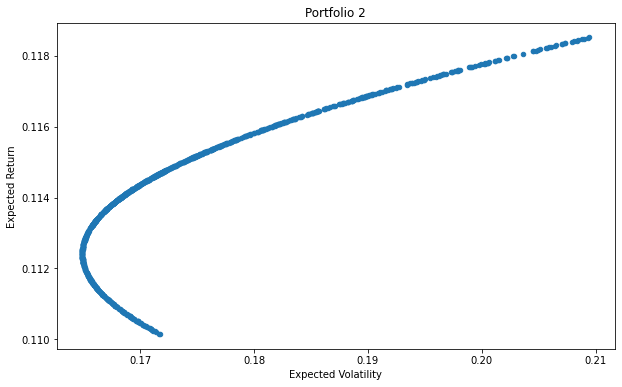

In [31]:
# Visualize Portfolio 2
portfo_2.plot(x='Volatility', y ='Return', kind = 'scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Portfolio 2')